In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ERROR: Error in parse(text = x, srcfile = src): <text>:5:8: unexpected symbol
4: 
5: import numpy
          ^


# Bellabeat Customer Analysis with R

## Introduction

Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy


## Data Analysis Question

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

## Business Task
Identify people smart devices usage and using that information to make high-level recommendations for Bellabeat’s marketing strategy.

## Loading Packages

In [13]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(skimr)
library(here)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Importing Dataset
For this project I use FitBit Fitness Tracker Data[](http://)

In [4]:
activity <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

## Data Cleaning

In [60]:
skim_without_charts(activity)
skim_without_charts(sleep)

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,ActivityDate,0,1,8,9,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,4.855407e+09,2.424805e+09,1503960366,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
3,numeric,TotalSteps,0,1,NA,NA,NA,NA,NA,7.637911e+03,5.087151e+03,0,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
4,numeric,TotalDistance,0,1,NA,NA,NA,NA,NA,5.489702e+00,3.924606e+00,0,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
5,numeric,TrackerDistance,0,1,NA,NA,NA,NA,NA,5.475351e+00,3.907276e+00,0,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
6,numeric,LoggedActivitiesDistance,0,1,NA,NA,NA,NA,NA,1.081709e-01,6.198965e-01,0,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
7,numeric,VeryActiveDistance,0,1,NA,NA,NA,NA,NA,1.502681e+00,2.658941e+00,0,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
8,numeric,ModeratelyActiveDistance,0,1,NA,NA,NA,NA,NA,5.675426e-01,8.835803e-01,0,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
9,numeric,LightActiveDistance,0,1,NA,NA,NA,NA,NA,3.340819e+00,2.040655e+00,0,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01


── Data Summary ────────────────────────
                           Values  
Name                       activity
Number of rows             940     
Number of columns          15      
_______________________            
Column type frequency:             
  character                1       
  numeric                  14      
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 ActivityDate          0             1   8   9     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable            n_missing complete_rate    mean      sd         p0
 1 Id                               0             1 4.86e+9 2.42e+9 1503960366
 2 TotalSteps                       0             1 7.64e+3 5.09e+3          0
 3 TotalDistance                    0             

,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,character,SleepDay,0,1,20,21,0,31,0,NA,NA,NA,NA,NA,NA,NA
2,numeric,Id,0,1,NA,NA,NA,NA,NA,5.000979e+09,2.060360e+09,1503960366,3977333714,4702921684,6962181067,8792009665
3,numeric,TotalSleepRecords,0,1,NA,NA,NA,NA,NA,1.118644e+00,3.455207e-01,1,1,1,1,3
4,numeric,TotalMinutesAsleep,0,1,NA,NA,NA,NA,NA,4.194673e+02,1.183447e+02,58,361,433,490,796
5,numeric,TotalTimeInBed,0,1,NA,NA,NA,NA,NA,4.586392e+02,1.271016e+02,61,403,463,526,961


── Data Summary ────────────────────────
                           Values
Name                       sleep 
Number of rows             413   
Number of columns          5     
_______________________          
Column type frequency:           
  character                1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 SleepDay              0             1  20  21     0       31          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable      n_missing complete_rate          mean      sd         p0
1 Id                         0             1 5000979403.   2.06e+9 1503960366
2 TotalSleepRecords          0             1          1.12 3.46e-1          1
3 TotalMinutesAsleep         0             1        419.   1.18e+2       

In [88]:
head(activity)
head (sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [16]:
activity_df <- clean_names(activity)
sleep_df <- clean_names(sleep)

In [65]:
colnames(activity_df)
colnames(sleep_df)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "tracker_distance"           "logged_activities_distance"
 [7] "very_active_distance"       "moderately_active_distance"
 [9] "light_active_distance"      "sedentary_active_distance" 
[11] "very_active_minutes"        "fairly_active_minutes"     
[13] "lightly_active_minutes"     "sedentary_minutes"         
[15] "calories"

[1] "id"                   "sleep_day"            "total_sleep_records" 
[4] "total_minutes_asleep" "total_time_in_bed"

## Understanding Some Summary Statistics

In [61]:
n_distinct(activity_df$id)
n_distinct(sleep_df$id)

[1] 33

[1] 24

from that analysis we know that number of participant in activity table are more than in sleep table

In [62]:
nrow(activity_df)
nrow(sleep_df)

[1] 940

[1] 413

In [59]:
activity_df %>%  
  select(total_steps,
         total_distance,
         sedentary_minutes,calories,lightly_active_minutes,fairly_active_minutes,very_active_minutes) %>%
  summary()


  total_steps    total_distance   sedentary_minutes    calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0    Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8    1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5    Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2    Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5    3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0    Max.   :4900  
 lightly_active_minutes fairly_active_minutes very_active_minutes
 Min.   :  0.0          Min.   :  0.00        Min.   :  0.00     
 1st Qu.:127.0          1st Qu.:  0.00        1st Qu.:  0.00     
 Median :199.0          Median :  6.00        Median :  4.00     
 Mean   :192.8          Mean   : 13.56        Mean   : 21.16     
 3rd Qu.:264.0          3rd Qu.: 19.00        3rd Qu.: 32.00     
 Max.   :518.0          Max.   :143.00        Max.   :210.00     

In [12]:
sleep_df %>%
    select(total_sleep_records,total_minutes_asleep,total_time_in_bed) %>%
summary()

 total_sleep_records total_minutes_asleep total_time_in_bed
 Min.   :1.000       Min.   : 58.0        Min.   : 61.0    
 1st Qu.:1.000       1st Qu.:361.0        1st Qu.:403.0    
 Median :1.000       Median :433.0        Median :463.0    
 Mean   :1.119       Mean   :419.5        Mean   :458.6    
 3rd Qu.:1.000       3rd Qu.:490.0        3rd Qu.:526.0    
 Max.   :3.000       Max.   :796.0        Max.   :961.0    

In [21]:
sleep_df %>% group_by(total_sleep_records) %>% summarise (avg_sleep = mean(total_minutes_asleep))

total_sleep_records,avg_sleep
<int>,<dbl>
1,413.6866
2,453.1395
3,644.0000


**Some interesting discoveries from this summary:**
* The average of sedentary is 991.2 minutes or at least 16 hours a day
* The majority of the participants are lightly active.
* The average of total steps is 7638. Which need to be incresed. According to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality.
* The average total sleep is 419.5 minutes or 7 hours. On average participant sleep 1 time for 7 hours and the max sleep is 3 time for 10 hours.



## Plotting a few Explorations 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


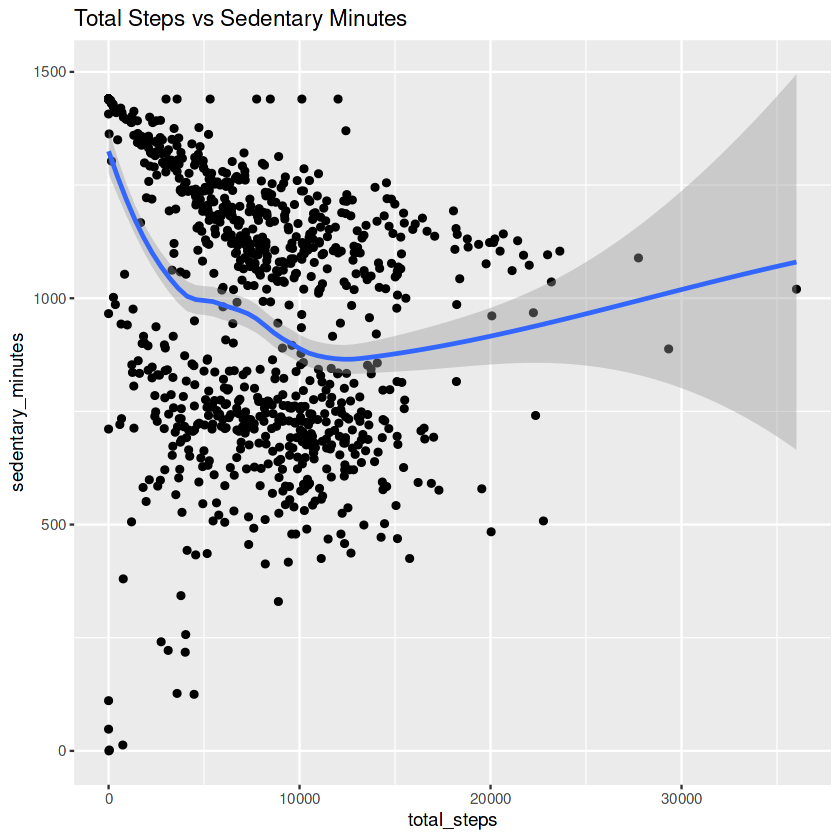

In [93]:
ggplot(data=activity_df, aes(x=total_steps, y=sedentary_minutes)) + geom_point() + geom_smooth()+labs(title="Total Steps vs Sedentary Minutes")

The correlation between total steps and sedentary is negative, which mean the more total step participant do, they will be more active and less sedentary

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


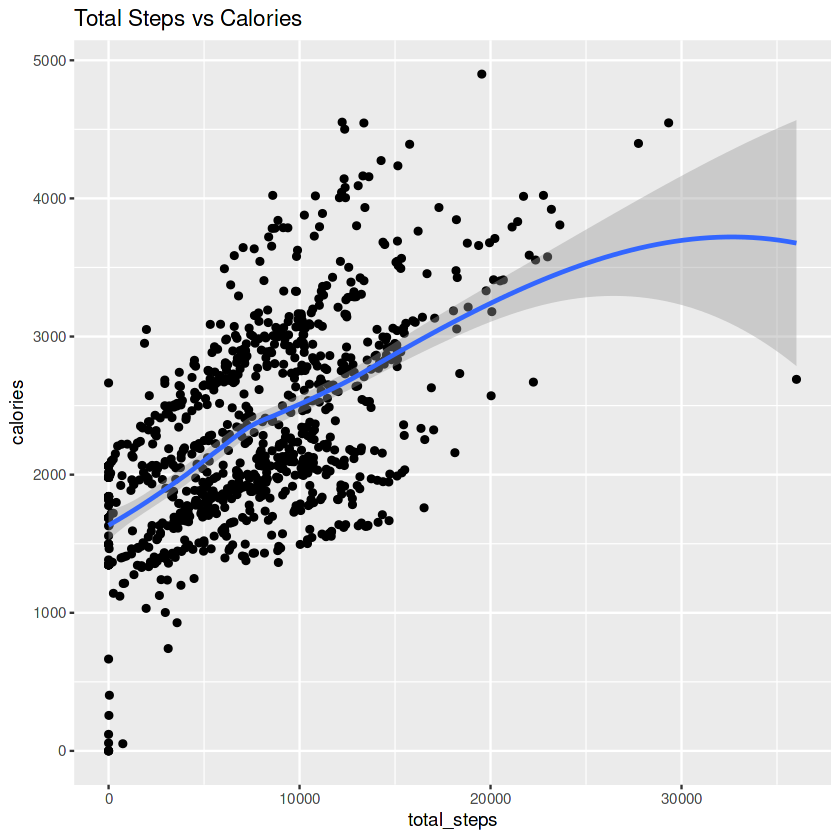

In [94]:
ggplot(data=activity_df, aes(x=total_steps, y=calories)) + geom_point() + geom_smooth() + labs(title="Total Steps vs Calories")

The correlation between total step and calories is positive, which mean the more step participant do the more calories will burn

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


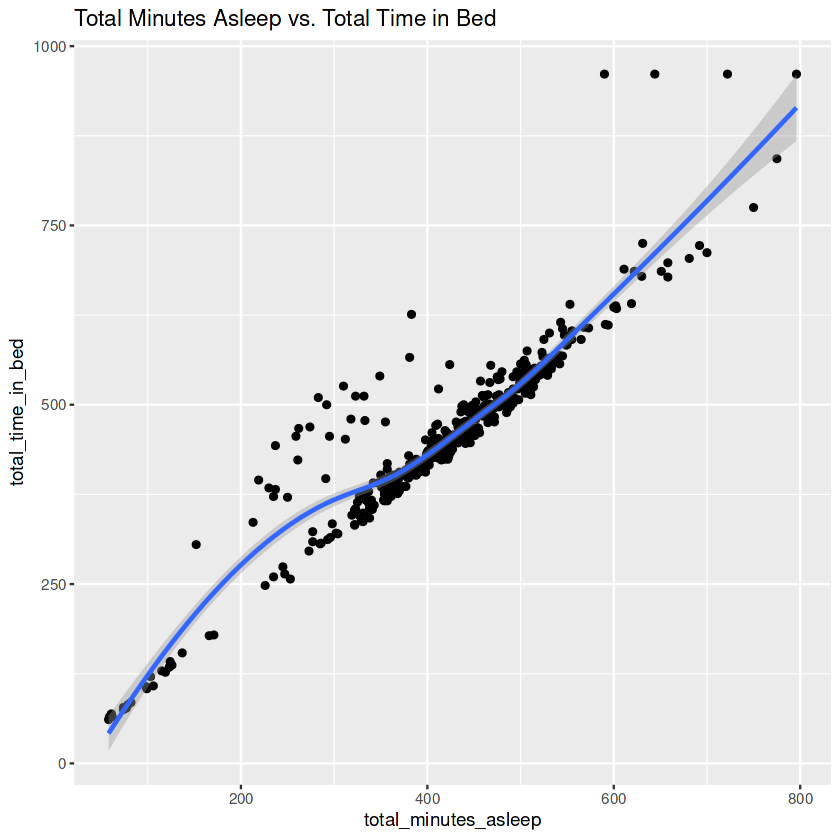

In [92]:
ggplot(data=sleep_df, aes(x=total_minutes_asleep, y=total_time_in_bed)) + geom_point() + geom_smooth()+labs(title="Total Minutes Asleep vs. Total Time in Bed")

The correlation between total minutes asleep and total time in bed is positive, which mean the more participant spend time in bed the more they will sleep

## Merging These Two Datasets Together 

In [76]:
combined_data <- merge(sleep_df,activity_df, by="id")
head(combined_data)

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/7/2016,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821
2,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/6/2016,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896
3,1503960366,4/12/2016 12:00:00 AM,1,327,346,5/1/2016,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820
4,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/30/2016,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947
5,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
6,1503960366,4/12/2016 12:00:00 AM,1,327,346,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797


In [55]:
n_distinct(combined_data$id)

[1] 24

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


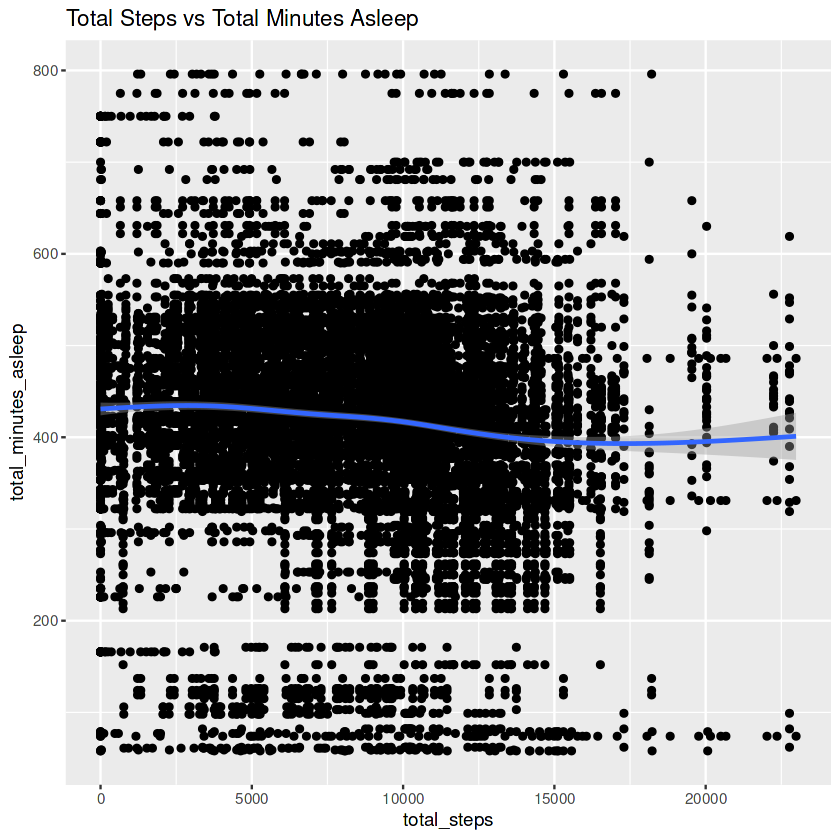

In [96]:
ggplot(data=combined_data, aes(x=total_steps, y=total_minutes_asleep)) + geom_point() + geom_smooth() +labs(title="Total Steps vs Total Minutes Asleep")

there is no correlation between total step and total time asleep